## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
data = pd.read_csv("QueryResults.csv",header=0,names=['DATE','TAG','POST'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
data.head()

,DATE,TAG,POST
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [4]:
data.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
data.count()

DATE    1991
TAG     1991
POST    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
tab = data.groupby('TAG').sum().sort_values(by=['POST'],ascending = False)
tab['POST']

TAG
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: POST, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [7]:
data.groupby('TAG').count()

,DATE,POST
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [8]:
data.DATE[1]

'2008-08-01 00:00:00'

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
type(data['DATE'][1])

str

In [10]:
print(pd.to_datetime(data['DATE'][1]))
type(pd.to_datetime(data['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [11]:
data.DATE = pd.to_datetime(data.DATE)
data.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [12]:
reshaped_data = data.pivot(columns="TAG",index="DATE",values="POST")
reshaped_data

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
reshaped_data.shape

(145, 14)

In [14]:
reshaped_data.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [15]:
reshaped_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [16]:
reshaped_data.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [17]:
reshaped_data.fillna(value=0,inplace=True)
reshaped_data

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [18]:
reshaped_data.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [19]:
import matplotlib.pyplot as plt


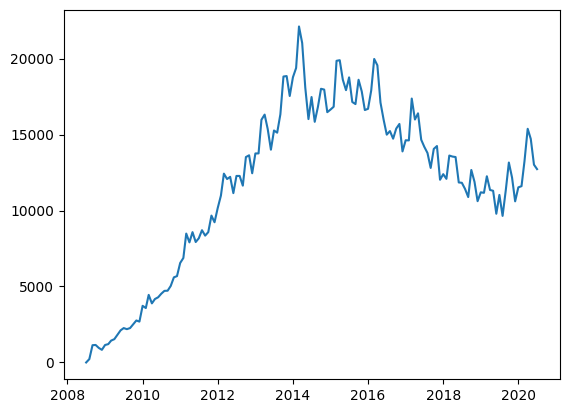

In [20]:
plt.plot(reshaped_data.index,reshaped_data.java)

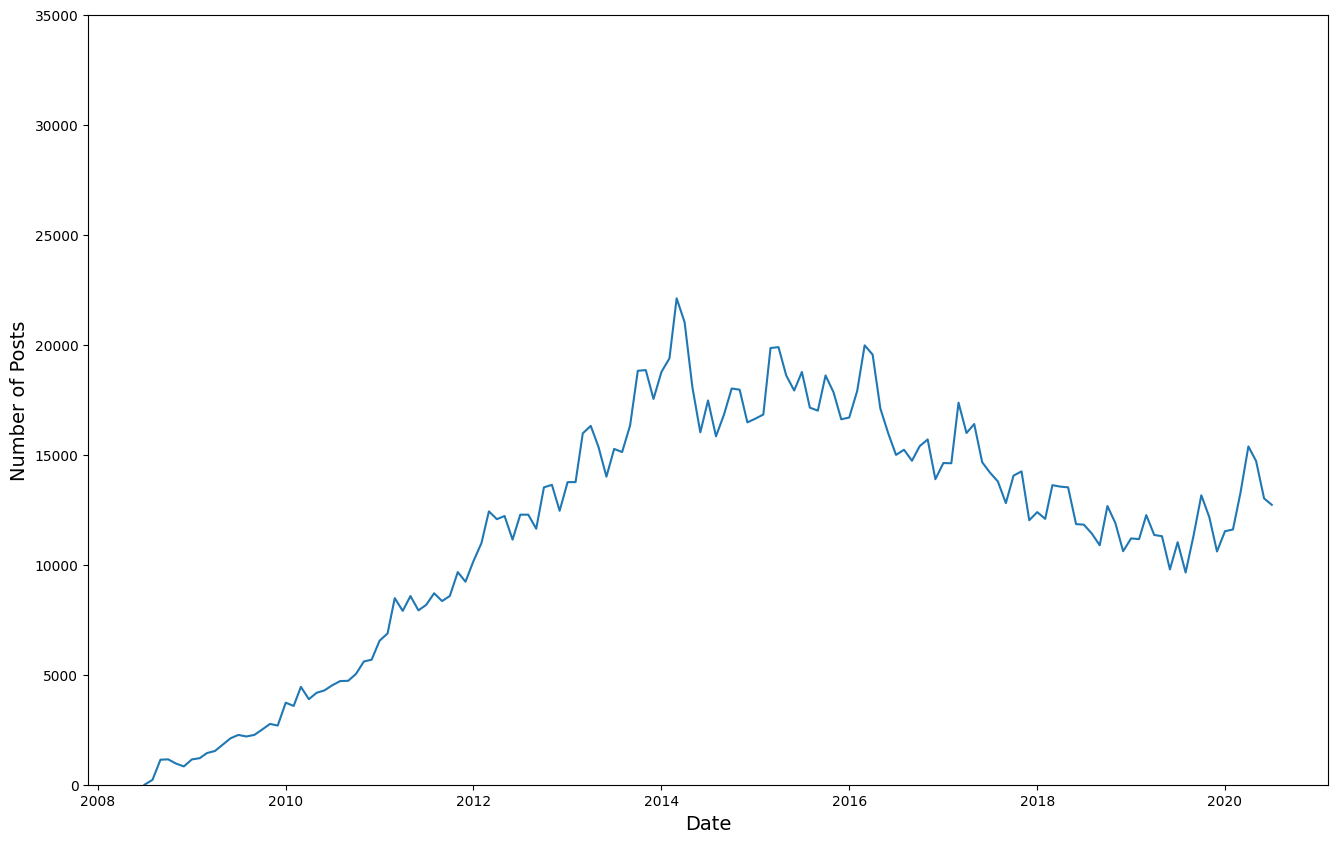

In [21]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_data.index, reshaped_data.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

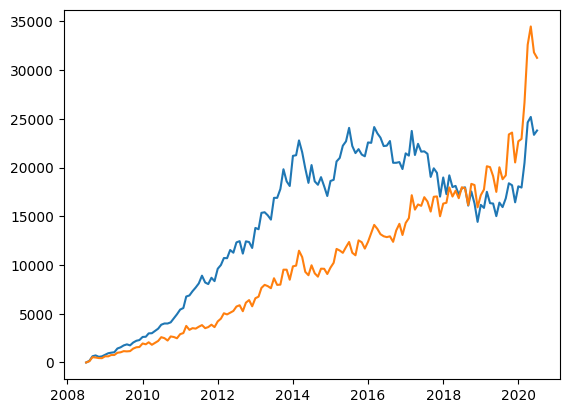

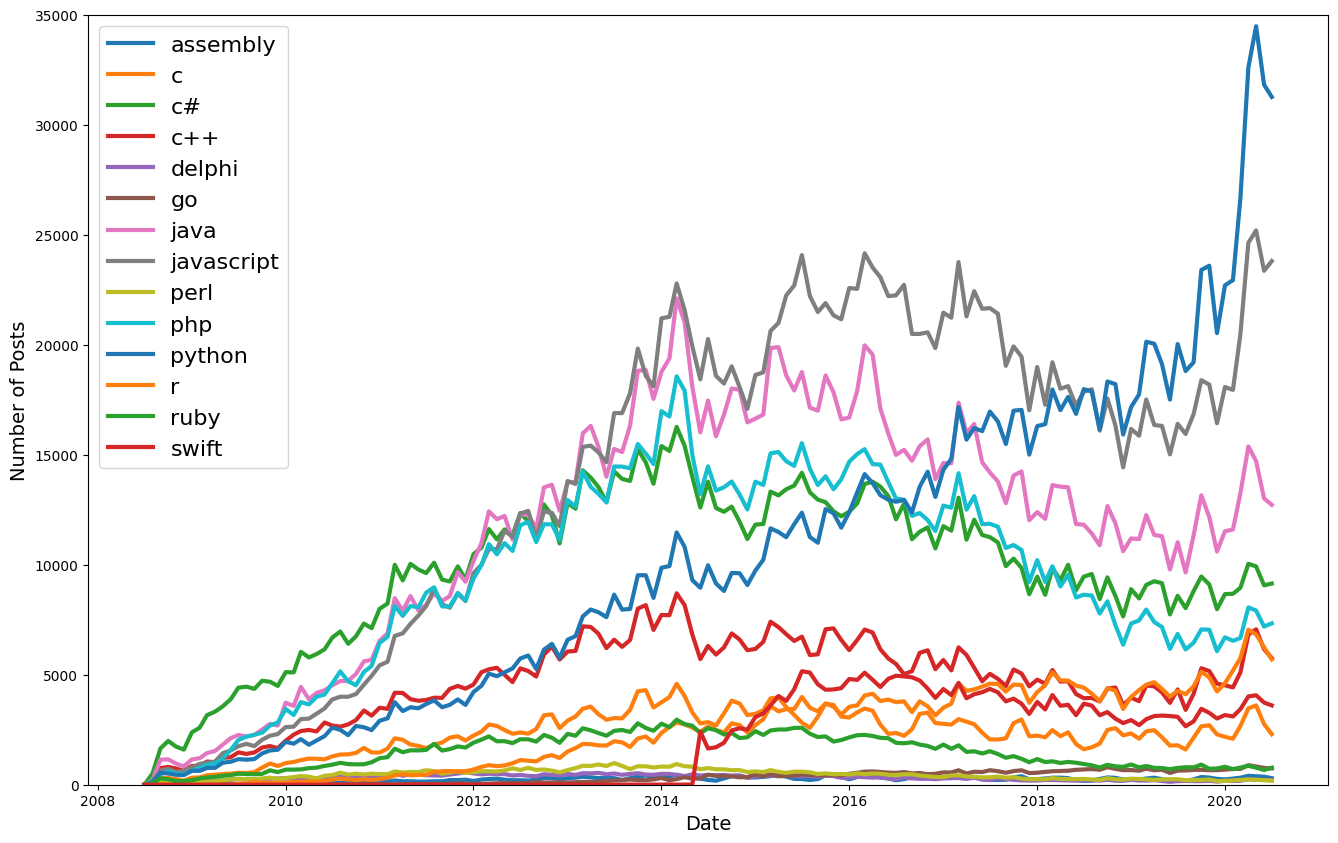

In [22]:
plt.plot(reshaped_data.index, reshaped_data.javascript,reshaped_data.index,reshaped_data.python,)
#or
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_data.columns:
    plt.plot(reshaped_data.index, reshaped_data[column],
             linewidth=3, label=reshaped_data[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [23]:
roll_data = reshaped_data.rolling(window=6).mean()
roll_data.tail(20)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2018-12-01,250.666667,2081.666667,8853.833333,4011.166667,196.666667,711.000000,11549.166667,16706.833333,249.166667,7829.666667,17410.000000,4079.166667,860.000000,3257.500000
2019-01-01,258.500000,2201.333333,8758.500000,4015.166667,199.000000,706.000000,11444.666667,16424.833333,251.166667,7611.500000,17273.666667,4008.833333,856.166667,3133.000000
2019-02-01,266.833333,2266.333333,8573.666667,3990.666667,196.333333,693.500000,11402.000000,16072.666667,255.166667,7423.000000,17253.000000,4035.666667,840.166667,2984.666667
2019-03-01,270.500000,2359.333333,8681.166667,4111.000000,197.000000,701.833333,11630.333333,16309.000000,259.333333,7452.666667,17916.666667,4159.166667,851.500000,2954.833333
2019-04-01,268.500000,2357.000000,8652.500000,4128.500000,193.666667,678.000000,11411.000000,16108.000000,246.000000,7295.666667,18202.833333,4203.666667,828.500000,2925.000000
2019-05-01,258.666667,2287.833333,8749.833333,4091.166667,191.833333,671.833333,11312.833333,16104.833333,244.833333,7281.166667,18355.000000,4217.166667,815.833333,2948.333333
2019-06-01,253.500000,2210.166667,8764.833333,4108.000000,184.333333,651.000000,11175.000000,16203.333333,248.000000,7249.666667,18619.833333,4310.666667,798.500000,3001.666667
2019-07-01,247.833333,2120.500000,8715.000000,4170.666667,175.000000,646.833333,11146.333333,16242.166667,243.833333,7170.500000,19097.666667,4355.833333,772.333333,3026.500000
2019-08-01,238.666667,2038.833333,8641.500000,4104.333333,172.000000,649.000000,10893.333333,16256.000000,234.166667,6950.166667,19274.166667,4325.000000,773.166667,3017.833333


(0.0, 35000.0)

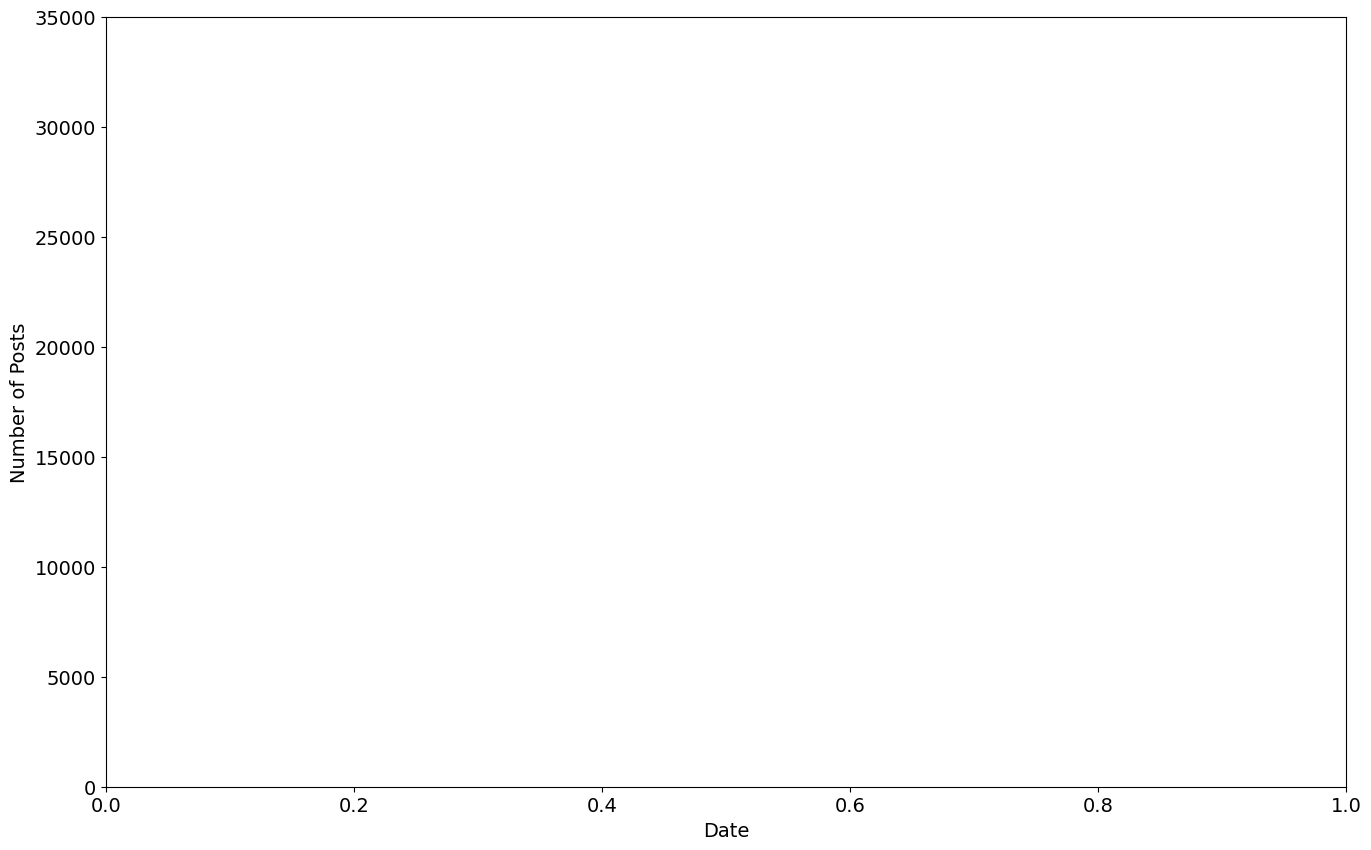

In [24]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

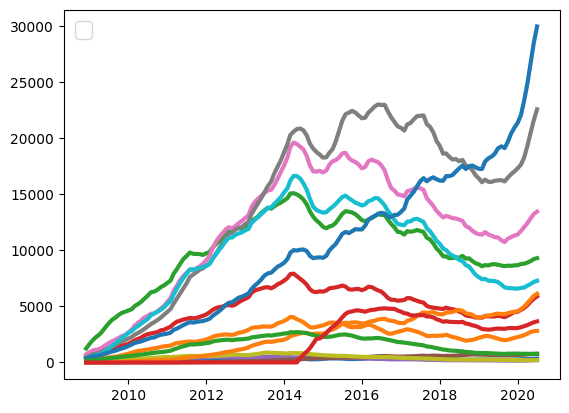

In [27]:
plt.legend(fontsize=16)
for column in roll_data.columns:
    plt.plot(roll_data.index, roll_data[column],
             linewidth=3, label=roll_data[column].name)